In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
import os
os.chdir("E://TSA-COURSE-NOTEBOOKS/TSA_COURSE_NOTEBOOKS/Data//")
os.getcwd()

'E:\\TSA-COURSE-NOTEBOOKS\\TSA_COURSE_NOTEBOOKS\\Data'

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [26]:
df = pd.read_csv('HospitalityEmployees.csv', index_col = 'Date', parse_dates = True)
df.index.freq = 'MS'

In [27]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [8]:
len(df)

348

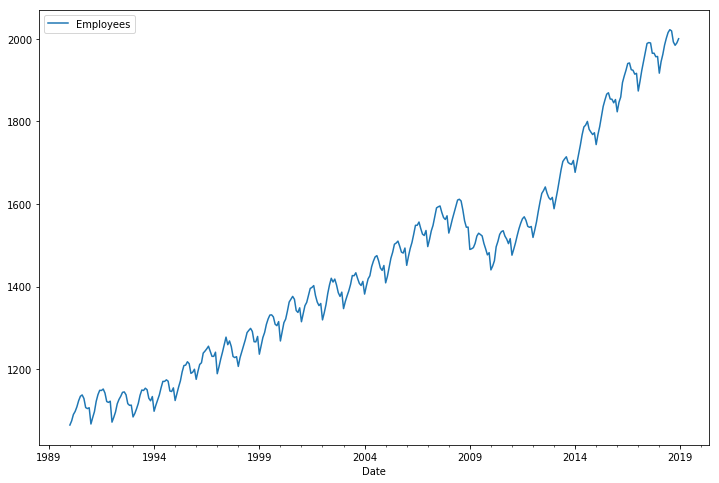

In [9]:
df.plot(figsize=(12,8))

In [11]:
#Running ETS decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Employees'],model='addtive')

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

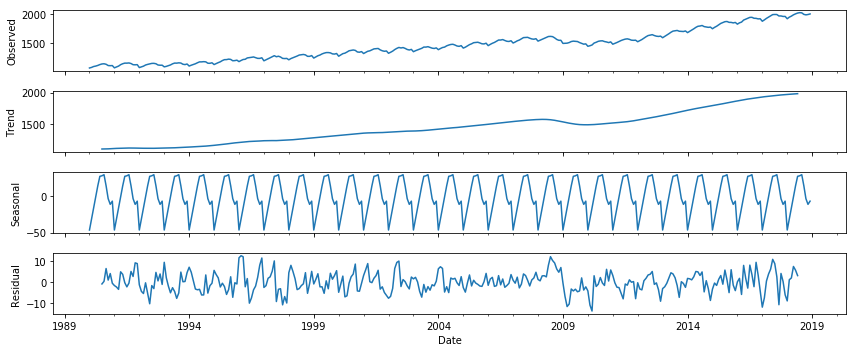

In [21]:
result.plot();

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

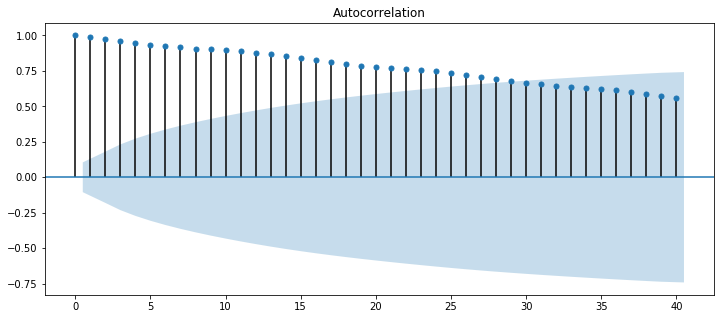

In [23]:
plot_acf(df['Employees'],lags = 40);

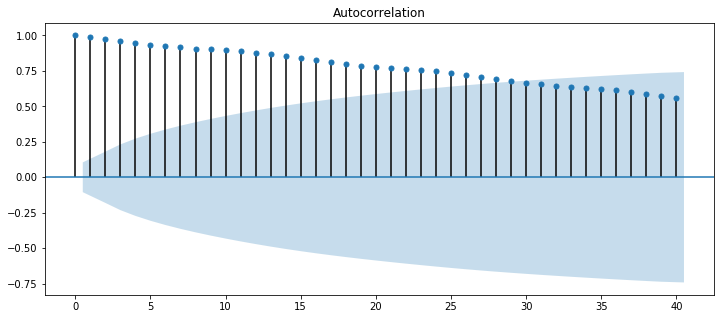

In [24]:
plot_acf(df['Employees'],lags = 40);

In [28]:
#Performing auto arima to find the sarima parameters
auto_arima(df['Employees'],seasonal = True,m = 12).summary()

C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\vishn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Like

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1098.306
Date:                            Tue, 14 Jan 2020   AIC                           2210.612
Time:                                    11:18:18   BIC                           2237.558
Sample:                                         0   HQIC                          2221.341
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.081      0.935      -0.010       0.011
ar.L1          0.9225      0.046     20.245      0.000       0.833       1.012
ma.L1         -0.9439      0.070    -13.421      0.000      -1.082      -0.806
ma.L2          0.1317      0.060      2.192      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    717.676      0.000       0.995       1.000
ma.S.L12      -0.7569      0.042    -17.884      0.000      -0.840      -0.674
sigma2        29.1930      1.701     17.161      0.000      25.859      32.527
===================================================================================
Ljung-Box (Q):                       32.10   Jarque-Bera (JB):                66.50
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
##Split the train and test data
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [32]:
model = SARIMAX(train['Employees'], order= (1,1,2), seasonal_order= (1,0,1,12))
results_sarima = model.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1058.058
Date:                            Tue, 14 Jan 2020   AIC                           2128.116
Time:                                    11:22:57   BIC                           2151.001
Sample:                                01-01-1990   HQIC                          2137.240
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.284      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.649      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.457      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    727.421      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.154      0.000      -0.838      -0.666
sigma2        28.7641      1.684     17.083      0.000      25.464      32.064
===================================================================================
Ljung-Box (Q):                       29.89   Jarque-Bera (JB):                73.34
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
##Obtain predicted values
start = len(train)
end = len(train) + len(test) -1

In [37]:
predictions = results_sarima.predict(start,end,typ='levels').rename('SARIMA TEST PREDICTIONS')

In [38]:
predictions

2018-01-01    1922.288233
2018-02-01    1941.849922
2018-03-01    1959.860115
2018-04-01    1983.212628
2018-05-01    2002.918690
2018-06-01    2019.451517
2018-07-01    2026.317120
2018-08-01    2028.257425
2018-09-01    2009.875575
2018-10-01    2004.786302
2018-11-01    1996.733260
2018-12-01    2000.534942
Freq: MS, Name: SARIMA TEST PREDICTIONS, dtype: float64

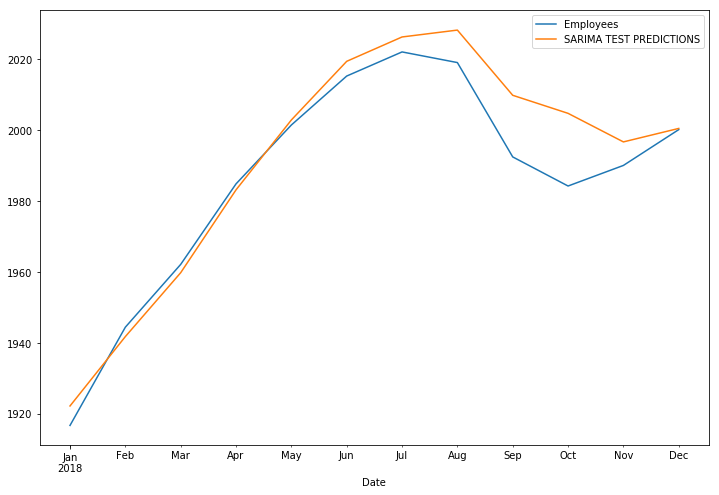

In [40]:
##Plotting against the known values
test['Employees'].plot(figsize = (12,8),legend = True)
predictions.plot(legend =True)

In [41]:
#Evaluate the results
rmse(test['Employees'],predictions)

8.813189667849986

In [43]:
##Retrain your model and forecast the one year future values
model1 = SARIMAX(df['Employees'],order= (1,1,2), seasonal_order= (1,0,1,12))
results_future = model1.fit()
fcast = results_future.predict(start = len(df), end = len(df)+11, typ = 'levels').rename('SARIMAX forecast')

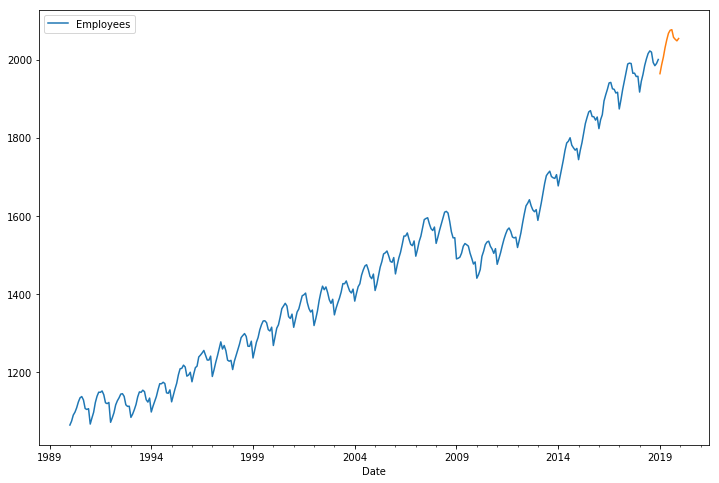

In [45]:
df['Employees'].plot(figsize=(12,8),legend = True)
fcast.plot()